# 서울시 범죄현황 데이터 분석 프로젝트

## 1. 환경설정

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

copy path 써도 됨 : C:\Users\SBA\Documents\GitHub\seoul_crime\EDA\data\seoul_crime_2021.csv

In [2]:
crime_raw_data = pd.read_csv('../data/seoul_crime_2021.csv', encoding='euc-kr')

데이터 출처 : https://www.data.go.kr/data/15054738/fileData.do

In [3]:
crime_raw_data.head()

,구분,죄종,발생검거,건수,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,중부,살인,발생,4,NaN,NaN,NaN,NaN,NaN
1,중부,살인,검거,4,NaN,NaN,NaN,NaN,NaN
2,중부,강도,발생,3,NaN,NaN,NaN,NaN,NaN
3,중부,강도,검거,3,NaN,NaN,NaN,NaN,NaN
4,중부,"강간,추행",발생,109,NaN,NaN,NaN,NaN,NaN


## 2. 데이터 전처리
### 2.1. 데이터 클리닝

In [4]:
crime_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   구분          310 non-null    object 
 1   죄종          310 non-null    object 
 2   발생검거        310 non-null    object 
 3   건수          310 non-null    int64  
 4   Unnamed: 4  0 non-null      float64
 5   Unnamed: 5  0 non-null      float64
 6   Unnamed: 6  0 non-null      float64
 7   Unnamed: 7  0 non-null      float64
 8   Unnamed: 8  0 non-null      float64
dtypes: float64(5), int64(1), object(3)
memory usage: 21.9+ KB


In [5]:
crime_raw_data['죄종'].unique()

array(['살인', '강도', '강간,추행', '절도', '폭력', '강간'], dtype=object)

In [6]:
crime_raw_data['발생검거'].unique()

array(['발생', '검거'], dtype=object)

In [7]:
crime_raw_data['구분'].unique()

array(['중부', '종로', '남대문', '서대문', '혜화', '용산', '성북', '동대문', '마포', '영등포',
       '성동', '동작', '광진', '서부', '강북', '금천', '중랑', '강남', '관악', '강서', '강동',
       '종암', '구로', '서초', '양천', '송파', '노원', '방배', '은평', '도봉', '수서'],
      dtype=object)

In [8]:
len(crime_raw_data['구분'].unique())

31

In [9]:
# 강간추행과 강간을 성범죄로 통일
crime_raw_data['죄종'] = crime_raw_data['죄종'].replace(['강간,추행', '강간'], '성범죄')

In [10]:
crime_raw_data['죄종'].unique()

array(['살인', '강도', '성범죄', '절도', '폭력'], dtype=object)

In [11]:
crime_raw_data.dropna(axis=1)

,구분,죄종,발생검거,건수
0,중부,살인,발생,4
1,중부,살인,검거,4
2,중부,강도,발생,3
3,중부,강도,검거,3
4,중부,성범죄,발생,109
...,...,...,...,...
305,수서,성범죄,검거,129
306,수서,절도,발생,855
307,수서,절도,검거,423
308,수서,폭력,발생,1198


In [12]:
crime_raw_data.dropna(axis=1, inplace=True)

In [13]:
crime_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   구분      310 non-null    object
 1   죄종      310 non-null    object
 2   발생검거    310 non-null    object
 3   건수      310 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 9.8+ KB


In [14]:
crime_raw_data.head()

,구분,죄종,발생검거,건수
0,중부,살인,발생,4
1,중부,살인,검거,4
2,중부,강도,발생,3
3,중부,강도,검거,3
4,중부,성범죄,발생,109


In [15]:
crime_station = pd.pivot_table(data=crime_raw_data, 
                               index='구분', 
                               columns=['죄종', '발생검거'], 
                               values='건수')

In [16]:
crime_station.head()

죄종      강도         살인         성범죄            절도              폭력        
발생검거    검거    발생   검거   발생     검거     발생     검거      발생      검거      발생
구분                                                                     
강남    11.0  13.0  6.0  8.0  325.0  428.0  737.0  1517.0  1699.0  1961.0
강동     6.0   6.0  3.0  3.0  103.0  124.0  889.0  1612.0  1461.0  1713.0
강북     1.0   1.0  4.0  4.0  115.0  136.0  537.0   777.0  1255.0  1383.0
강서     3.0   3.0  7.0  9.0  188.0  246.0  921.0  1540.0  1925.0  2098.0
관악     6.0   7.0  4.0  8.0  269.0  321.0  929.0  1860.0  1926.0  2248.0

In [17]:
crime_station.columns

MultiIndex([( '강도', '검거'),
            ( '강도', '발생'),
            ( '살인', '검거'),
            ( '살인', '발생'),
            ('성범죄', '검거'),
            ('성범죄', '발생'),
            ( '절도', '검거'),
            ( '절도', '발생'),
            ( '폭력', '검거'),
            ( '폭력', '발생')],
           names=['죄종', '발생검거'])

In [18]:
# 강도 검거 최다 5개 구
crime_station['강도', '검거'].sort_values(ascending=False).head()

구분
수서     12.0
영등포    11.0
강남     11.0
동대문     8.0
중랑      7.0
Name: (강도, 검거), dtype: float64

In [19]:
# 살인 발생 최다 5개 구
crime_station['살인', '발생'].sort_values(ascending=False).head()

구분
서초     9.0
강서     9.0
관악     8.0
영등포    8.0
강남     8.0
Name: (살인, 발생), dtype: float64

In [20]:
# 강남의 강도 발생 건수
crime_station.loc['강남', ('강도', '발생')]

13.0

In [21]:
crime_station.loc['강남', '강도']

발생검거
검거    11.0
발생    13.0
Name: 강남, dtype: float64

In [22]:
crime_station.columns.get_level_values(0)

Index(['강도', '강도', '살인', '살인', '성범죄', '성범죄', '절도', '절도', '폭력', '폭력'], dtype='object', name='죄종')

In [23]:
crime_station.columns.get_level_values(1)

Index(['검거', '발생', '검거', '발생', '검거', '발생', '검거', '발생', '검거', '발생'], dtype='object', name='발생검거')

In [24]:
tmp = crime_station.columns.get_level_values(0) + crime_station.columns.get_level_values(1)
tmp

Index(['강도검거', '강도발생', '살인검거', '살인발생', '성범죄검거', '성범죄발생', '절도검거', '절도발생',
       '폭력검거', '폭력발생'],
      dtype='object')

In [25]:
len(crime_station.columns), len(tmp)

(10, 10)

In [26]:
crime_station.columns = tmp

### 2.2. 데이터 전처리
- 경찰서별 담당행정구역 컬럼
- 컬럼 생성 후 인덱스로 설정

In [27]:
dict_sample = {
    'name' : 'seyong',
    'age' : 10,
    'class' : 'google'
}

In [28]:
dict_sample.keys(), dict_sample.values()

(dict_keys(['name', 'age', 'class']), dict_values(['seyong', 10, 'google']))

In [29]:
dict_sample.items()

dict_items([('name', 'seyong'), ('age', 10), ('class', 'google')])

In [30]:
for key, val in dict_sample.items():
    print(key, ':', val)

name : seyong
age : 10
class : google


In [31]:
crime_station.index

Index(['강남', '강동', '강북', '강서', '관악', '광진', '구로', '금천', '남대문', '노원', '도봉',
       '동대문', '동작', '마포', '방배', '서대문', '서부', '서초', '성동', '성북', '송파', '수서',
       '양천', '영등포', '용산', '은평', '종로', '종암', '중랑', '중부', '혜화'],
      dtype='object', name='구분')

자치구는 25개인데 경찰서는 31개 : 은평구 2개, 강남구 2개, 종로구 2개, 중구 2개, 서초구 2개, 성북구 2개

In [32]:
real_gu = {'은평구' : ['서부', '은평'], '강남구' : ['강남', '수서'], '종로구' : ['종로', '혜화'], 
           '중구' : ['중부', '남대문'], '서초구' : ['서초', '방배'], '성북구' : ['성북', '종암']}

In [33]:
real_gu.values()

dict_values([['서부', '은평'], ['강남', '수서'], ['종로', '혜화'], ['중부', '남대문'], ['서초', '방배'], ['성북', '종암']])

In [34]:
list(np.array(list(real_gu.values())).reshape(-1))

['서부', '은평', '강남', '수서', '종로', '혜화', '중부', '남대문', '서초', '방배', '성북', '종암']

In [35]:
final_gu = {}
for i in list(crime_station.index):
    if i not in list(np.array(list(real_gu.values())).reshape(-1)):
        final_gu[i] = i + '구'
    else:
        for key in list(real_gu.keys()):
            for j in range(2):
                final_gu[real_gu[key][j]] = key

In [36]:
final_gu

{'서부': '은평구',
 '은평': '은평구',
 '강남': '강남구',
 '수서': '강남구',
 '종로': '종로구',
 '혜화': '종로구',
 '중부': '중구',
 '남대문': '중구',
 '서초': '서초구',
 '방배': '서초구',
 '성북': '성북구',
 '종암': '성북구',
 '강동': '강동구',
 '강북': '강북구',
 '강서': '강서구',
 '관악': '관악구',
 '광진': '광진구',
 '구로': '구로구',
 '금천': '금천구',
 '노원': '노원구',
 '도봉': '도봉구',
 '동대문': '동대문구',
 '동작': '동작구',
 '마포': '마포구',
 '서대문': '서대문구',
 '성동': '성동구',
 '송파': '송파구',
 '양천': '양천구',
 '영등포': '영등포구',
 '용산': '용산구',
 '중랑': '중랑구'}

In [37]:
crime_station.index

Index(['강남', '강동', '강북', '강서', '관악', '광진', '구로', '금천', '남대문', '노원', '도봉',
       '동대문', '동작', '마포', '방배', '서대문', '서부', '서초', '성동', '성북', '송파', '수서',
       '양천', '영등포', '용산', '은평', '종로', '종암', '중랑', '중부', '혜화'],
      dtype='object', name='구분')

In [38]:
len(final_gu), len(crime_station.index)

(31, 31)

In [39]:
final_gu_list = []
for indx in list(crime_station.index):
    final_gu_list.append(final_gu[indx])
final_gu_list

['강남구',
 '강동구',
 '강북구',
 '강서구',
 '관악구',
 '광진구',
 '구로구',
 '금천구',
 '중구',
 '노원구',
 '도봉구',
 '동대문구',
 '동작구',
 '마포구',
 '서초구',
 '서대문구',
 '은평구',
 '서초구',
 '성동구',
 '성북구',
 '송파구',
 '강남구',
 '양천구',
 '영등포구',
 '용산구',
 '은평구',
 '종로구',
 '성북구',
 '중랑구',
 '중구',
 '종로구']

In [40]:
crime_station['행정구'] = final_gu_list
crime_station.head()

,강도검거,강도발생,살인검거,살인발생,성범죄검거,성범죄발생,절도검거,절도발생,폭력검거,폭력발생,행정구
구분,,,,,,,,,,,
강남,11.0,13.0,6.0,8.0,325.0,428.0,737.0,1517.0,1699.0,1961.0,강남구
강동,6.0,6.0,3.0,3.0,103.0,124.0,889.0,1612.0,1461.0,1713.0,강동구
강북,1.0,1.0,4.0,4.0,115.0,136.0,537.0,777.0,1255.0,1383.0,강북구
강서,3.0,3.0,7.0,9.0,188.0,246.0,921.0,1540.0,1925.0,2098.0,강서구
관악,6.0,7.0,4.0,8.0,269.0,321.0,929.0,1860.0,1926.0,2248.0,관악구


- 행정구 컬럼을 인덱스로 설정

In [41]:
crime_gu = crime_station.pivot_table(index='행정구', aggfunc=np.sum)
crime_gu.head()

C:\Users\SBA\AppData\Local\Temp\ipykernel_9124\713441119.py:1: FutureWarning: The provided callable <function sum at 0x000001E52913F1A0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  crime_gu = crime_station.pivot_table(index='행정구', aggfunc=np.sum)


,강도검거,강도발생,살인검거,살인발생,성범죄검거,성범죄발생,절도검거,절도발생,폭력검거,폭력발생
행정구,,,,,,,,,,
강남구,23.0,25.0,11.0,12.0,454.0,578.0,1160.0,2372.0,2749.0,3159.0
강동구,6.0,6.0,3.0,3.0,103.0,124.0,889.0,1612.0,1461.0,1713.0
강북구,1.0,1.0,4.0,4.0,115.0,136.0,537.0,777.0,1255.0,1383.0
강서구,3.0,3.0,7.0,9.0,188.0,246.0,921.0,1540.0,1925.0,2098.0
관악구,6.0,7.0,4.0,8.0,269.0,321.0,929.0,1860.0,1926.0,2248.0


In [42]:
crime_gu['살인발생'].sort_values(ascending=False).head(11)

행정구
강남구     12.0
서초구      9.0
강서구      9.0
관악구      8.0
영등포구     8.0
금천구      7.0
중구       6.0
노원구      6.0
종로구      6.0
광진구      5.0
구로구      5.0
Name: 살인발생, dtype: float64

In [43]:
# 절도범죄가 가장 덜 발생한 곳 5군데 -> 안전한 축에 속하는 구
crime_gu['절도발생'].sort_values(ascending=True).head(5)

행정구
도봉구    772.0
강북구    777.0
성북구    895.0
성동구    905.0
용산구    945.0
Name: 절도발생, dtype: float64

- 검거율 칼럼 생성

In [44]:
(crime_gu['절도검거'] / crime_gu['절도발생']) * 100

행정구
강남구     48.903879
강동구     55.148883
강북구     69.111969
강서구     59.805195
관악구     49.946237
광진구     53.323904
구로구     55.395683
금천구     51.332675
노원구     48.052902
도봉구     48.704663
동대문구    53.145161
동작구     59.787422
마포구     48.344371
서대문구    54.722493
서초구     45.974717
성동구     54.917127
성북구     52.960894
송파구     49.160079
양천구     51.890289
영등포구    48.539720
용산구     51.216931
은평구     57.935393
종로구     46.709917
중구      57.779515
중랑구     59.685490
dtype: float64

In [45]:
my_cols = ['절도검거', '절도발생']
crime_gu[my_cols]

,절도검거,절도발생
행정구,,
강남구,1160.0,2372.0
강동구,889.0,1612.0
강북구,537.0,777.0
강서구,921.0,1540.0
관악구,929.0,1860.0
광진구,754.0,1414.0
구로구,770.0,1390.0
금천구,520.0,1013.0
노원구,654.0,1361.0


In [46]:
arrest_col = []
occur_col = []

for i in range(len(crime_gu.columns)):
    if i % 2 == 0:
        arrest_col.append(crime_gu.columns[i])
    else:
        occur_col.append(crime_gu.columns[i])

In [47]:
arrest_col

['강도검거', '살인검거', '성범죄검거', '절도검거', '폭력검거']

In [48]:
crime_gu[occur_col]

,강도발생,살인발생,성범죄발생,절도발생,폭력발생
행정구,,,,,
강남구,25.0,12.0,578.0,2372.0,3159.0
강동구,6.0,3.0,124.0,1612.0,1713.0
강북구,1.0,4.0,136.0,777.0,1383.0
강서구,3.0,9.0,246.0,1540.0,2098.0
관악구,7.0,8.0,321.0,1860.0,2248.0
광진구,4.0,5.0,208.0,1414.0,1456.0
구로구,2.0,5.0,182.0,1390.0,1907.0
금천구,3.0,7.0,134.0,1013.0,1282.0
노원구,3.0,6.0,156.0,1361.0,1899.0


In [49]:
crime_gu[arrest_col].div(crime_gu[occur_col].values)

,강도검거,살인검거,성범죄검거,절도검거,폭력검거
행정구,,,,,
강남구,0.920000,0.916667,0.785467,0.489039,0.870212
강동구,1.000000,1.000000,0.830645,0.551489,0.852890
강북구,1.000000,1.000000,0.845588,0.691120,0.907448
강서구,1.000000,0.777778,0.764228,0.598052,0.917541
관악구,0.857143,0.500000,0.838006,0.499462,0.856762
광진구,1.000000,0.600000,0.774038,0.533239,0.879121
구로구,0.500000,1.000000,0.648352,0.553957,0.805978
금천구,1.333333,0.857143,0.768657,0.513327,0.864275
노원구,1.000000,1.000000,0.807692,0.480529,0.796735


In [50]:
np.round((crime_gu[arrest_col].div(crime_gu[occur_col].values)) * 100, 2)

,강도검거,살인검거,성범죄검거,절도검거,폭력검거
행정구,,,,,
강남구,92.00,91.67,78.55,48.90,87.02
강동구,100.00,100.00,83.06,55.15,85.29
강북구,100.00,100.00,84.56,69.11,90.74
강서구,100.00,77.78,76.42,59.81,91.75
관악구,85.71,50.00,83.80,49.95,85.68
광진구,100.00,60.00,77.40,53.32,87.91
구로구,50.00,100.00,64.84,55.40,80.60
금천구,133.33,85.71,76.87,51.33,86.43
노원구,100.00,100.00,80.77,48.05,79.67


In [51]:
arrest_rate = ['강도검거율', '살인검거율', '성범죄검거율', '절도검거율', '폭력검거율']
crime_gu[arrest_rate] = np.round((crime_gu[arrest_col].div(crime_gu[occur_col].values)) * 100, 2)
crime_gu.head()

,강도검거,강도발생,살인검거,살인발생,성범죄검거,성범죄발생,절도검거,절도발생,폭력검거,폭력발생,강도검거율,살인검거율,성범죄검거율,절도검거율,폭력검거율
행정구,,,,,,,,,,,,,,,
강남구,23.0,25.0,11.0,12.0,454.0,578.0,1160.0,2372.0,2749.0,3159.0,92.00,91.67,78.55,48.90,87.02
강동구,6.0,6.0,3.0,3.0,103.0,124.0,889.0,1612.0,1461.0,1713.0,100.00,100.00,83.06,55.15,85.29
강북구,1.0,1.0,4.0,4.0,115.0,136.0,537.0,777.0,1255.0,1383.0,100.00,100.00,84.56,69.11,90.74
강서구,3.0,3.0,7.0,9.0,188.0,246.0,921.0,1540.0,1925.0,2098.0,100.00,77.78,76.42,59.81,91.75
관악구,6.0,7.0,4.0,8.0,269.0,321.0,929.0,1860.0,1926.0,2248.0,85.71,50.00,83.80,49.95,85.68


In [52]:
crime_gu.tail()

,강도검거,강도발생,살인검거,살인발생,성범죄검거,성범죄발생,절도검거,절도발생,폭력검거,폭력발생,강도검거율,살인검거율,성범죄검거율,절도검거율,폭력검거율
행정구,,,,,,,,,,,,,,,
용산구,1.0,1.0,2.0,3.0,103.0,141.0,484.0,945.0,1069.0,1291.0,100.00,66.67,73.05,51.22,82.80
은평구,3.0,3.0,5.0,4.0,133.0,166.0,825.0,1424.0,1457.0,1647.0,100.00,125.00,80.12,57.94,88.46
종로구,4.0,4.0,3.0,6.0,102.0,156.0,504.0,1079.0,1188.0,1467.0,100.00,50.00,65.38,46.71,80.98
중구,6.0,6.0,6.0,6.0,97.0,161.0,739.0,1279.0,1224.0,1409.0,100.00,100.00,60.25,57.78,86.87
중랑구,7.0,6.0,4.0,4.0,117.0,141.0,835.0,1399.0,1442.0,1660.0,116.67,100.00,82.98,59.69,86.87


In [53]:
crime_gu[crime_gu['강도검거율'] > 100]['강도검거'] / crime_gu[crime_gu['강도검거율'] > 100]['강도발생']

행정구
금천구     1.333333
동대문구    1.142857
중랑구     1.166667
dtype: float64

In [54]:
for col in arrest_rate:
    print(col)
    print(crime_gu[crime_gu[col] > 100][col[:-3] + '검거'] / crime_gu[crime_gu[col] > 100][col[:-3] + '발생'])

강도검거율
행정구
금천구     1.333333
동대문구    1.142857
중랑구     1.166667
dtype: float64
살인검거율
행정구
동대문구    1.333333
동작구     1.500000
성동구     1.333333
은평구     1.250000
dtype: float64
성범죄검거율
Series([], dtype: float64)
절도검거율
Series([], dtype: float64)
폭력검거율
Series([], dtype: float64)


In [55]:
# 100 넘는 값들 100으로 대체
crime_gu[crime_gu[arrest_rate] > 100] = 100

In [57]:
crime_gu.head()

,강도검거,강도발생,살인검거,살인발생,성범죄검거,성범죄발생,절도검거,절도발생,폭력검거,폭력발생,강도검거율,살인검거율,성범죄검거율,절도검거율,폭력검거율
행정구,,,,,,,,,,,,,,,
강남구,23.0,25.0,11.0,12.0,454.0,578.0,1160.0,2372.0,2749.0,3159.0,92.00,91.67,78.55,48.90,87.02
강동구,6.0,6.0,3.0,3.0,103.0,124.0,889.0,1612.0,1461.0,1713.0,100.00,100.00,83.06,55.15,85.29
강북구,1.0,1.0,4.0,4.0,115.0,136.0,537.0,777.0,1255.0,1383.0,100.00,100.00,84.56,69.11,90.74
강서구,3.0,3.0,7.0,9.0,188.0,246.0,921.0,1540.0,1925.0,2098.0,100.00,77.78,76.42,59.81,91.75
관악구,6.0,7.0,4.0,8.0,269.0,321.0,929.0,1860.0,1926.0,2248.0,85.71,50.00,83.80,49.95,85.68


# 11월 10일 시작

In [63]:
for i in crime_gu.columns:
    if i.endswith('발생'):
        print(i.strip('발생'))

강도
살인
성범죄
절도
폭력


In [64]:
crime_gu.rename(
    columns={'강도발생' : '강도', 
             '살인발생' : '살인',
             '성범죄발생' : '성범죄',
             '절도발생' : '절도',
             '폭력발생' : '폭력'}, 
    inplace=True
)

In [65]:
crime_gu.drop(arrest_col, axis=1, inplace=True)
crime_gu.head()

,강도,살인,성범죄,절도,폭력,강도검거율,살인검거율,성범죄검거율,절도검거율,폭력검거율
행정구,,,,,,,,,,
강남구,25.0,12.0,578.0,2372.0,3159.0,92.00,91.67,78.55,48.90,87.02
강동구,6.0,3.0,124.0,1612.0,1713.0,100.00,100.00,83.06,55.15,85.29
강북구,1.0,4.0,136.0,777.0,1383.0,100.00,100.00,84.56,69.11,90.74
강서구,3.0,9.0,246.0,1540.0,2098.0,100.00,77.78,76.42,59.81,91.75
관악구,7.0,8.0,321.0,1860.0,2248.0,85.71,50.00,83.80,49.95,85.68


In [66]:
for i in range(len(occur_col)):
    occur_col[i] = occur_col[i].strip('발생')
occur_col

['강도', '살인', '성범죄', '절도', '폭력']

<Axes: xlabel='행정구'>

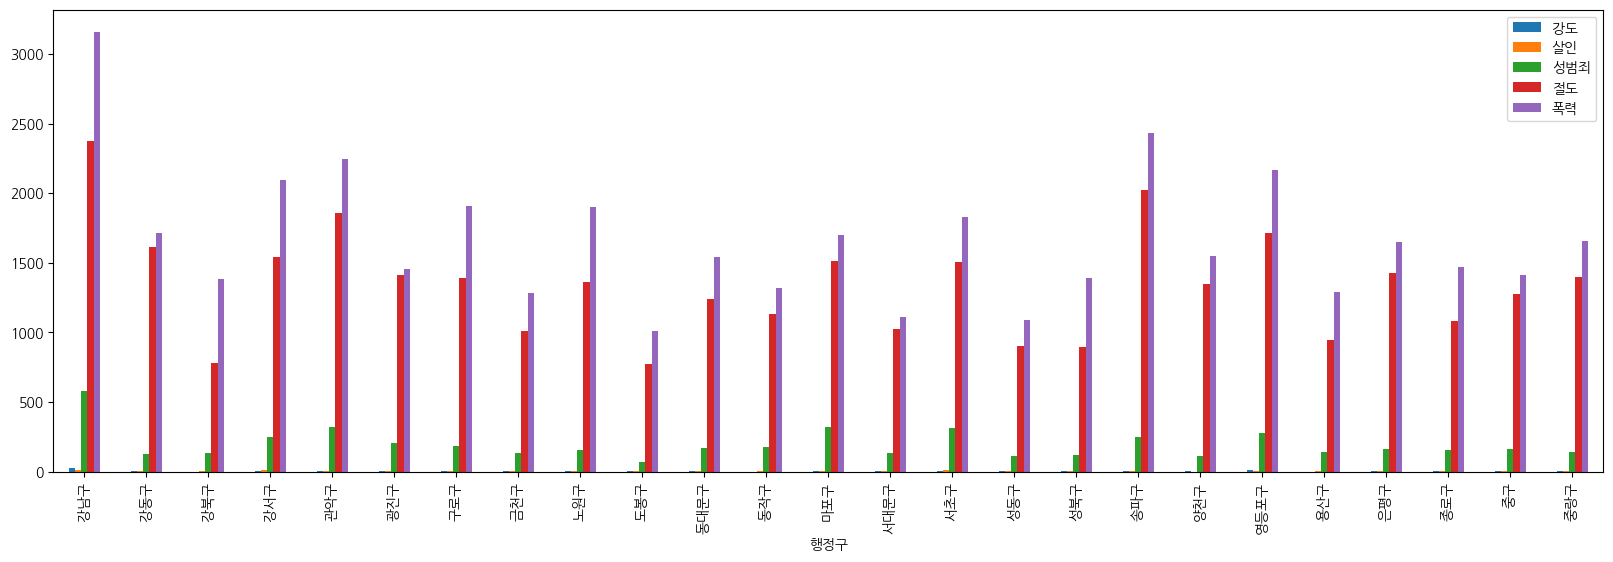

In [71]:
crime_gu[occur_col].plot(kind='bar', figsize=(20, 6))

<Axes: xlabel='행정구'>

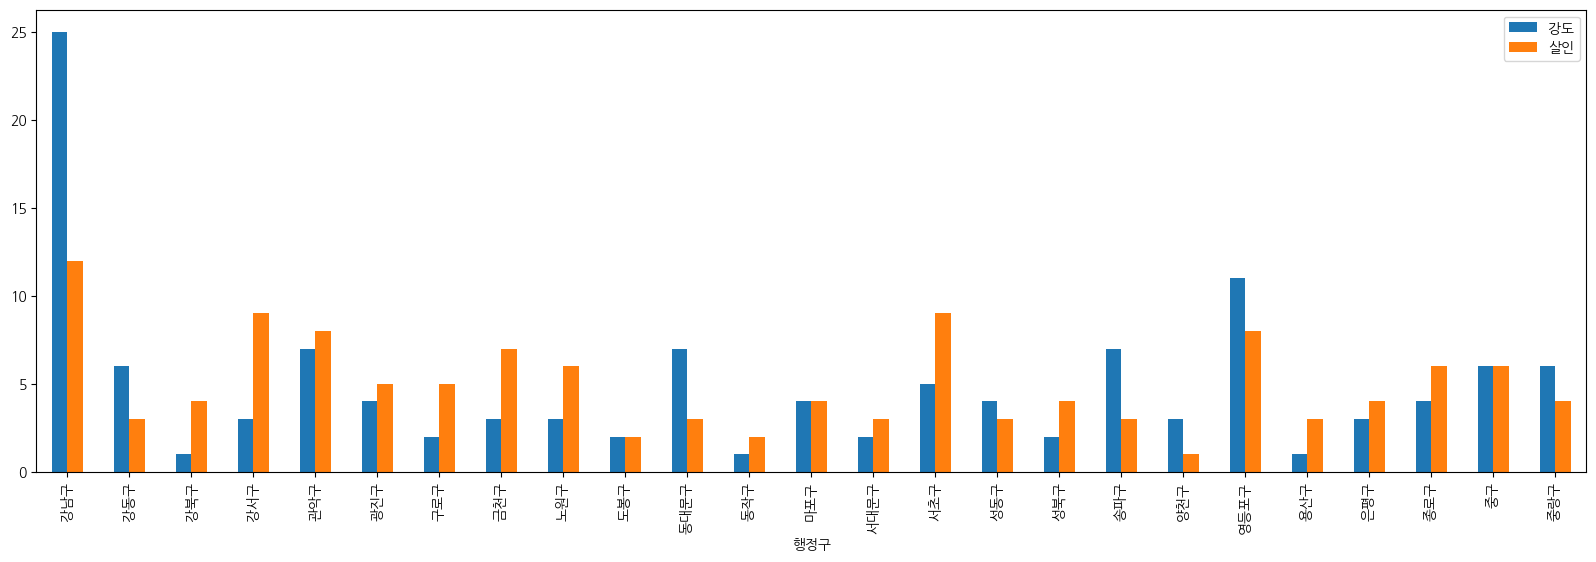

In [73]:
crime_gu[occur_col[:2]].plot(kind='bar', figsize=(20, 6))